In [1]:
import pandas as pd
import quandl

df = quandl.get('WIKI/GOOGL')

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close', 'Adj. Volume']]

In [3]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [4]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [5]:
import math
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.1*len(df)))

In [6]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335


In [2]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [8]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

print(df.head())

print(len(X), len(y))

            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335
3081 3081


In [9]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [10]:
# clf = LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)

# # saving
# with open('linearregeression.pickle', 'wb') as f:
#     pickle.dump(clf, f)
    
# using pickle
pickle_in = open('linearregeression.pickle', 'rb')
clf = pickle.load(pickle_in)


In [11]:
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(accuracy, forecast_set, forecast_out)

0.7425154861383543 [ 788.25090307  767.81527648  790.82985635  797.37436364  803.42770965
  791.61914987  801.97700799  801.68087989  795.80088058  798.27464827
  800.07690744  806.06818705  791.44928684  779.91874547  780.84882341
  795.18211569  792.57876123  808.42458338  812.38858389  826.74014846
  825.24427087  831.49752846  834.77931511  832.61605033  826.56117076
  829.95716245  833.2665859   830.14042739  827.82484435  825.76862202
  827.1533039   821.88448689  820.69773424  809.18827454  824.9025446
  825.11691257  830.86877429  841.97138522  845.00026946  844.00851378
  848.17369855  847.83291979  848.81495452  845.62646041  847.59299179
  841.64844058  846.59046253  861.53300555  867.56614543  876.7130285
  874.3829471   859.67701908  839.919239    837.80420193  832.28172148
  835.10799632  837.59146536  839.90319046  846.86298825  847.65718635
  848.42919205  852.84050281  856.98848879  858.2722346   855.19394848
  860.58459892  864.74519794  867.37525602  869.43875249  86

In [12]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [13]:
style.use('ggplot')

In [14]:
df['Forecast'] = np.nan

In [15]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

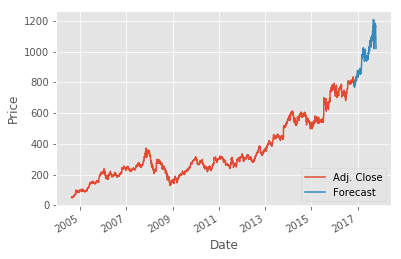

In [16]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()